# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```

In [ ]:
import pandas as pd
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
breast_cancer_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
data = pd.read_csv(breast_cancer_data, na_values='?', 
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


1. a) Implement a decision tree (you can use decision tree implementation from existing libraries).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(699, 9) (699,)


1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [35]:
"""
Accuracy for Gini
"""
model = DecisionTreeClassifier(criterion = "gini")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy (Gini): ", accuracy_score(y_test, y_pred))

Accuracy (Gini):  0.9428571428571428


In [ ]:
"""
Accuracy for Entropy
"""
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy (Entropy): ", accuracy_score(y_test, y_pred))

Accuracy (Entropy):  0.9285714285714286


1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

From above we see that accuracy for Gini ($94.2\%$) is higher than accuracy for entropy ($92.8\%$), as criterion.

In [36]:
"""
Reporting best accuracies
"""
accuracies = []
for max_depth in range(1, 5):
    for criterion in ["entropy", "gini"]:
        model = DecisionTreeClassifier(
            criterion = criterion, 
            max_depth = max_depth
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append([criterion, max_depth, accuracy_score(y_test, y_pred)])
df = pd.DataFrame(
    data = accuracies,
    columns = ["Criterion", "Max Depth", "Accuracy"]
)
print(df)
print()
print(df.groupby(['Accuracy'], sort=True).max())

  Criterion  Max Depth  Accuracy
0   entropy          1  0.928571
1      gini          1  0.907143
2   entropy          2  0.928571
3      gini          2  0.935714
4   entropy          3  0.935714
5      gini          3  0.928571
6   entropy          4  0.935714
7      gini          4  0.928571

         Criterion  Max Depth
Accuracy                     
0.907143      gini          1
0.928571      gini          4
0.935714      gini          4


Thus, as mentioned, the best result is obtained is an accuracy of $95.7\%$ with Gini and a max depth of 5.

1. d) Experiment with different approaches to decide when to terminate the tree (number of layers, purity measure, etc). Report and give explanations for all approaches. 

In [ ]:
def get_accuracy(criterion, min_impurity_decrease):
    model = DecisionTreeClassifier(
        criterion = criterion,
        min_impurity_decrease = min_impurity_decrease
    )
    model.fit(X_train, y_train)
    return accuracy_score(y_test, model.predict(X_test))

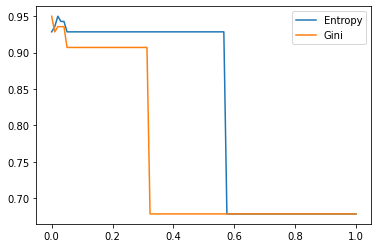

In [ ]:
x_axis = np.linspace(0,1,100)
y_axis = [get_accuracy("entropy", x) for x in x_axis]
plt.plot(x_axis, y_axis, label = "Entropy")
y_axis = [get_accuracy("gini", x) for x in x_axis]
plt.plot(x_axis, y_axis, label = "Gini")
plt.legend()
plt.show()

Experimentation with respect to purity measure in shown in the above graph. With respect to number of layers, decision trees show a little increase in the accuracy (due to better fit) but then drop quite a lot (due to overfitting).

*2*. What is boosting, bagging and  stacking?
Which class does random forests belong to and why?

Answer:

*   Boosting: Boosting is a technique that can be used to improve the accuracy of a decision tree. It is a method of training a decision tree by sequentially adding weak classifiers to a strong classifier.
*   Bagging: Bagging is a method of training a decision tree by bootstrapping a random sample of the training data. In case of bagging, training happens parallely.
*   Stacking: Stacking, similar to bagging and boosting, involves combining the predictions from multiple machine learning models on the same dataset.

Random forest belongs to bagging. This is because in a random forest we have multiple trees such that prediction of the forest is given by the prediction of all the trees in the forest.


3. Implement random forest algorithm using different decision trees . 

In [ ]:
class RandomForest:
    def __init__(self):
        self.n = 0
    
    def update(self, n_trees):
        self.n = n_trees
    
    def predict(self, trees, row):
        predictions = [tree.predict(row)[0] for tree in trees]
        return max(set(predictions), key=predictions.count)
    
    def train(self, sample_X, sample_y):
        trees = []
        for i in range(self.n):
            tree = DecisionTreeClassifier()
            tree.fit(sample_X, sample_y)
            trees.append(tree)
        pred = [self.predict(trees, X_test.iloc[i:i + 1, :]) for i in range(X_test.shape[0])]
        return accuracy_score(y_test, pred)

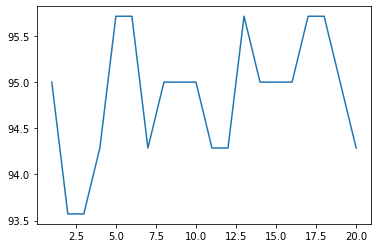

In [27]:
indices = np.random.choice(X_train.shape[0]-1, np.random.randint(X_train.shape[0]), replace=False)
sample_X = X_train.iloc[indices]
sample_y = y_train.iloc[indices]
x_axis = range(1, 21)
y_axis = []

model = RandomForest()
for x in x_axis:
    model.update(x)
    y_axis.append((100 * model.train(sample_X, sample_y)))
plt.plot(x_axis, y_axis)
plt.show()

4. Report the accuracies obtained after using the Random forest algorithm and compare it with the best accuracies obtained with the decision trees. 

In [28]:
print("Max accuracy obtained: ", max(y_axis))

Max accuracy obtained:  95.71428571428572


This accuracy of $95.7\%$ is higher than what we saw with a Decision Tree (Gini), which was $94.2\%$.

5. Submit your solution as a separate pdf in the final zip file of your submission


Compute a decision tree with the goal to predict the food review based on its smell, taste and portion size.

(a) Compute the entropy of each rule in the first stage.

(b) Show the final decision tree. Clearly draw it.

Submit a handwritten response. Clearly show all the steps.



Answers written in the associated document (in the zipped folder submitted).